Régression logistique

c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


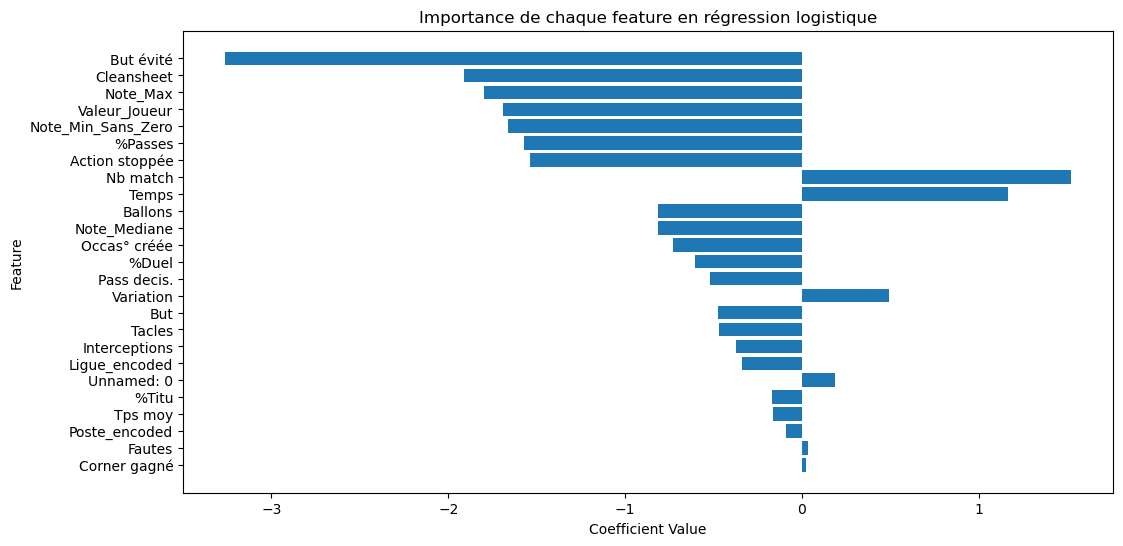

In [3]:
# Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Import des données
df = pd.read_csv("C:/Users/Dylan/Desktop/Portfolio/MPG/MPG ENCODED.csv")

#Division des données
X = df.drop('Note_encoded', axis=1)
y = df['Note_encoded']

#Entrainement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Création de l'objet StandardScaler
scaler = StandardScaler()

#Ajustement et transformation des données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

#Transformation des données de test en utilisant les mêmes paramètres de mise à l'échelle
X_test_scaled = scaler.transform(X_test)

#Création du modèle de régression logistique
model = LogisticRegression()

#Entrainement du modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

#Obtention des coefficients attribués à chaque caractéristique
coefficients = model.coef_[0]

#Association des coefficients aux noms des caractéristiques
feature_names = X.columns

#Création du DataFrame pour afficher les coefficients par caractéristique
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

#Tri des caractéristiques par coefficient absolu décroissant pour mettre en évidence les plus importantes
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

#Affichage les coefficients dans un graphique trié par ordre décroissant
plt.figure(figsize=(12, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Importance de chaque feature en régression logistique')
plt.gca().invert_yaxis()
plt.show()


Print des scores de train et de test

In [4]:
print('Score sur ensemble train', model.score(X_train, y_train))

print('Score sur ensemble test', model.score(X_test, y_test))

Score sur ensemble train 0.20267857142857143
Score sur ensemble test 0.17914438502673796


c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Affichage de la matrice de confusion

c:\Users\Dylan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.3155080213903743
Precision: 0.29287516581738543
Recall: 0.3155080213903743
F1 Score: 0.29757783298693835


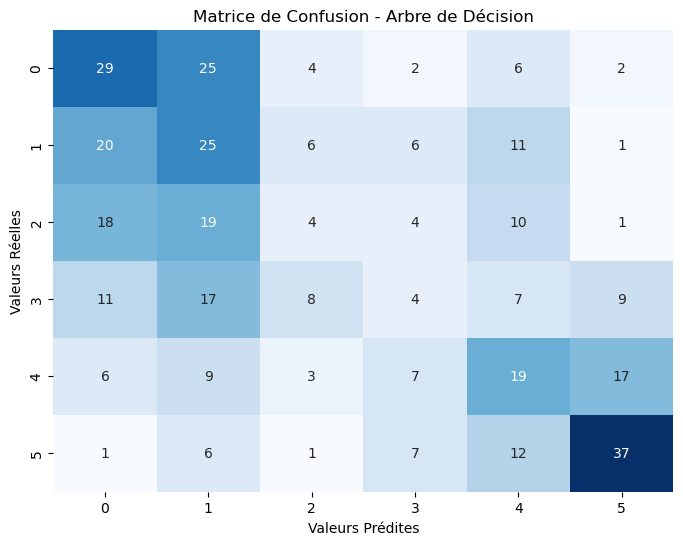

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Création du modèle de régression logistique
model = LogisticRegression(random_state=42)

#Entrainement du modèle
model.fit(X_train, y_train)

#Génération des prédictions
y_pred = model.predict(X_test)

#Calcul des métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Création de la variable confusion
confusion = confusion_matrix(y_test, y_pred)

#Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion - Régression logistique')
plt.show()
